<a href="https://colab.research.google.com/github/GeneralHassaan/Projects/blob/main/analysis_of_Kmeans_hassaan_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hassaan 


In [2]:
# imports

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

In [3]:
filename = '/content/cust_seg.csv'

df = pd.read_csv(filename)

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.drop(['Customer Id' , 'Edu', 'Unnamed: 0'] , axis=1, inplace = True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Years Employed   850 non-null    int64  
 2   Income           850 non-null    int64  
 3   Card Debt        850 non-null    float64
 4   Other Debt       850 non-null    float64
 5   Defaulted        700 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 46.6 KB


In [7]:
df.describe()

,Age,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [8]:
df.isna().any()

Age                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted           True
DebtIncomeRatio    False
dtype: bool

In [9]:
df.dropna(inplace = True)

In [10]:
df.isna().sum()

Age                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [11]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
X_scaled.head()

,Age,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.768304,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528
1,1.519090,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222
2,-0.232744,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495
3,-0.733267,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528
4,1.519090,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609


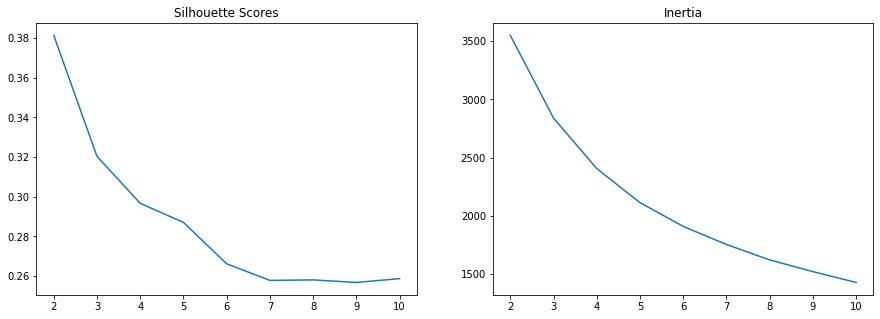

In [12]:
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

Clustering the data into 3 groups.
In both the graphs above, we can see that there is an elbow at 3. Also the silhouette score seems to favor 3 groups as well.

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Age,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,6,19,0.124,1.073,0.0,6.3,0
1,47,26,100,4.582,8.218,0.0,12.8,2
2,33,10,57,6.111,5.802,1.0,20.9,1
3,29,4,19,0.681,0.516,0.0,6.3,0
4,47,31,253,9.308,8.908,0.0,7.2,2


In [14]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,33.661800,7.469586,35.598540,0.781966,1.742457,0.000000,7.651582
1,1,31.392405,3.696203,30.462025,1.474405,2.696867,0.993671,13.782911
2,2,42.801527,16.931298,95.244275,4.069863,7.622000,0.198473,14.197710


**Cluster 0** has a mean age of 33, with an average person having worked atleast 7 years. This age group has the least debt  across the table comparing to other clusters. </br>
**Cluster 1** has an average age of 31. This group of people have been employeed the least across all clusters. They are the highest defaulted average across the group. This group has the lowest income.</br>
**Cluster 2** This group has the highest age compared to the other 2 clusters. Also with the highest income but their debt to income ratio is also the highest, with other debts being at a 7.6% and card debts at 4%.

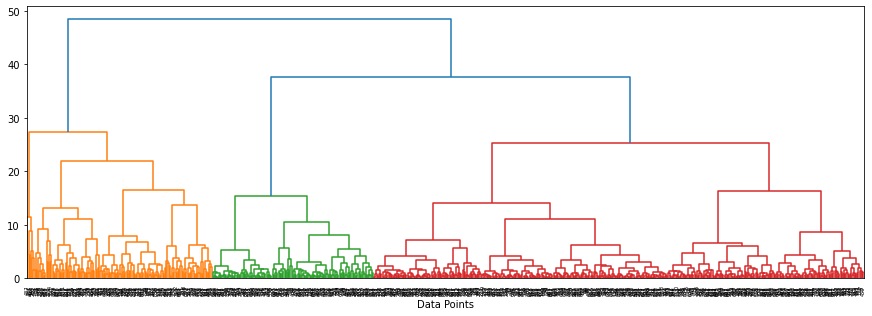

In [15]:
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.xlabel('Data Points');

In [16]:
#using this dendogram, we are able to determine which clusters have the greatest 
# distance b/w clusters.

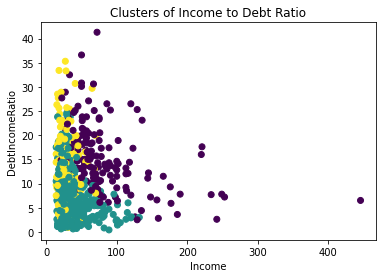

In [21]:
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['Income'], df['DebtIncomeRatio'], c = df['cluster'])
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.title('Clusters of Income to Debt Ratio');


Looking at this scatter plot, we can see how the debt to income ratio is higher in people who are earning less then 50K and their debts are higher as well whereas for those who make closer to 100k and more, their debt ratios are significantly less.

In [19]:
df.loc[df['cluster']==1].index

Int64Index([  0,   3,   6,   7,   9,  12,  16,  17,  20,  23,
            ...
            837, 838, 839, 840, 841, 842, 843, 844, 846, 848],
           dtype='int64', length=410)

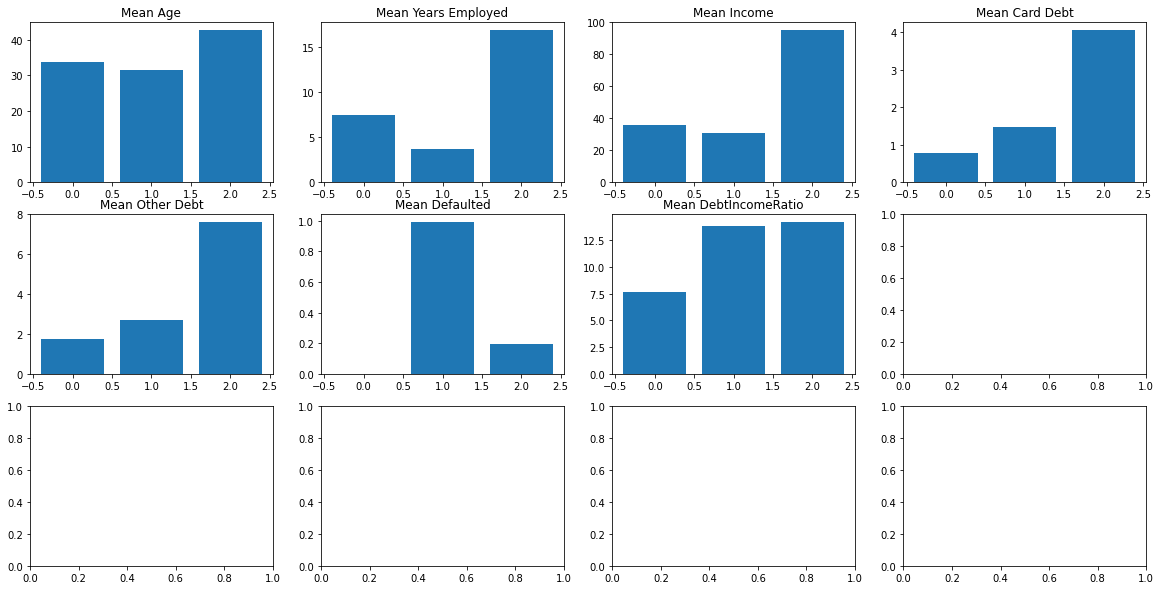

In [22]:
fig, axes = plt.subplots(3,4, figsize = (20, 10))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')